In [ ]:
import pandas as pd
import numpy as np
import re
import string
import nltk
from nltk.stem.wordnet import WordNetLemmatizer
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
!pip install num2words
import num2words
!pip install transformers
import transformers
from transformers import BertTokenizer, BertConfig
from sklearn.model_selection import train_test_split
import math

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 116 kB 5.0 MB/s 
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13723 sha256=b631981c075e271c2461778f7829157c8bb66bad946eb0a9e600f53fbfd8af8d
  Stored in directory: /root/.cache/pip/wheels/72/b0/3f/1d95f96ff986c7dfffe46ce2be4062f38ebd04b506c77c81b9
Successfully built docopt
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.7 MB 5.0 MB/s 
     |████████████████████████████████| 101 kB 12.4 MB/s 
     |████████████████████████████████| 6.6 MB 50.9 MB/s 
     |████████████████████████████████| 596 kB 73.6 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
#step 1- Mount your Google Drive to Collaboratory
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df= pd.read_csv('/content/drive/MyDrive/ABSA MS/ashish/roberta_labelling.csv')

In [ ]:
df.head()

,Unnamed: 0,Review,Rating,clean_reviews,sentence_reviews,room,staff,location,service,food,cosine_pred_category,cosine_pred_percentage,aspect_Polarity,asp_score
0,0,nice hotel expensive parking got good deal sta...,4,nice hotel expensive parking got good deal sta...,nice hotel expensive parking got good deal sta...,0.314967,0.201532,0.273320,0.229622,0.141261,room,0.314967,POSITIVE,0.998728
1,1,nice hotel expensive parking got good deal sta...,4,nice hotel expensive parking got good deal sta...,arrived late evening took advice previous rev...,0.190782,0.280859,0.244333,0.333305,0.112914,service,0.333305,POSITIVE,0.982104
2,2,nice hotel expensive parking got good deal sta...,4,nice hotel expensive parking got good deal sta...,check quick easy,0.127808,0.147495,0.227857,0.233826,0.187619,service,0.233826,POSITIVE,0.998047
3,3,nice hotel expensive parking got good deal sta...,4,nice hotel expensive parking got good deal sta...,little disappointed non existent view room ro...,0.480039,0.230525,0.221496,0.174181,0.158015,room,0.480039,NEGATIVE,0.999477
4,4,nice hotel expensive parking got good deal sta...,4,nice hotel expensive parking got good deal sta...,bed comfortable woke stiff neck high pillows,0.184796,0.073833,0.020726,0.015454,0.106296,room,0.184796,NEGATIVE,0.998174


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


POSITIVE    6517
NEGATIVE    3486
Name: aspect_Polarity, dtype: int64

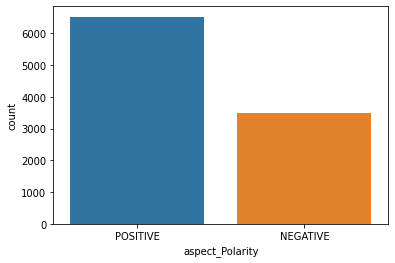

In [ ]:
import seaborn as sns
sns.countplot(df.aspect_Polarity)
df['aspect_Polarity'].value_counts()

In [ ]:
 from sklearn.utils import shuffle
 def cap_data(df):
    cap_df= pd.DataFrame()
    cap_df = df[df['aspect_Polarity']== 'POSITIVE'][:4000]
    cap_df = cap_df.append(df[df['aspect_Polarity']== 'NEGATIVE'])
    cap_df = shuffle(cap_df)   
    return(cap_df)

df = cap_data(df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


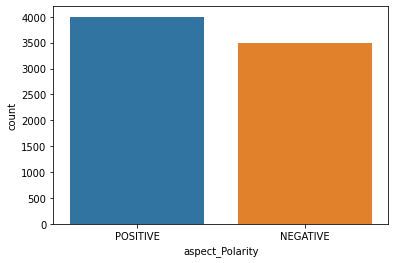

In [ ]:
import seaborn as sns
sns.countplot(df.aspect_Polarity)

In [ ]:
df.aspect_Polarity.value_counts()

POSITIVE    4000
NEGATIVE    3486
Name: aspect_Polarity, dtype: int64

Split into train and test



In [ ]:
df_new,test = train_test_split(df,test_size = 0.2)
train, eva = train_test_split(df_new,test_size = 0.2)


In [ ]:
train.head()

,Unnamed: 0,Review,Rating,clean_reviews,sentence_reviews,room,staff,location,service,food,cosine_pred_category,cosine_pred_percentage,aspect_Polarity,asp_score
748,748,disappointed arranging anticipated girl weeken...,2,disappointed arranging anticipated girl weeken...,days later received email hotel thanking stay...,0.256700,0.212228,0.111644,0.188745,0.076721,room,0.256700,NEGATIVE,0.998340
2424,2424,"loved sheraton towers seattle, great hotel gre...",5,"loved sheraton towers seattle, great hotel gre...",going sheraton f nice,0.211899,0.094156,0.212798,0.239522,0.111369,service,0.239522,POSITIVE,0.996398
2431,2431,best deal town write reviews feel compelled ti...,5,best deal town write reviews feel compelled ti...,staying hotel currently times past,0.292484,0.173627,0.147009,0.105391,0.062952,room,0.292484,POSITIVE,0.979962
3349,3349,price right stayed travelodge mid-late march 2...,3,price right stayed travelodge mid late march t...,clerk wheeled luggage cart moving stuff easie...,0.220388,0.263650,0.061921,0.229658,0.123493,staff,0.263650,POSITIVE,0.980059
3886,3886,princess pea arrived hour check-in waiting 15 ...,2,princess pea arrived hour check in waiting fif...,not kimpton perfect bed boasted brochure,0.321359,0.164495,0.252766,0.140134,0.115247,room,0.321359,POSITIVE,0.996805


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


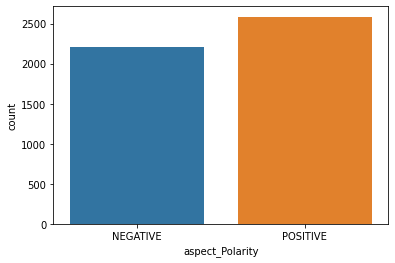

In [ ]:
import seaborn as sns
sns.countplot(train.aspect_Polarity)

In [ ]:
train.aspect_Polarity.value_counts()

POSITIVE    2586
NEGATIVE    2204
Name: aspect_Polarity, dtype: int64

In [ ]:
!pip install simpletransformers


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 249 kB 4.9 MB/s 
     |████████████████████████████████| 1.3 MB 60.0 MB/s 
     |████████████████████████████████| 43 kB 2.5 MB/s 
     |████████████████████████████████| 1.8 MB 54.3 MB/s 
     |████████████████████████████████| 365 kB 74.0 MB/s 
     |████████████████████████████████| 9.1 MB 53.1 MB/s 
     |████████████████████████████████| 181 kB 75.2 MB/s 
     |████████████████████████████████| 157 kB 69.8 MB/s 
     |████████████████████████████████| 63 kB 2.3 MB/s 
     |████████████████████████████████| 157 kB 76.8 MB/s 
     |████████████████████████████████| 157 kB 80.6 MB/s 
     |████████████████████████████████| 157 kB 78.5 MB/s 
     |████████████████████████████████| 157 kB 56.5 MB/s 
     |████████████████████████████████| 156 kB 76.4 MB/s 
     |████████████████████████████████| 212 kB 55.0 MB/s 
     |██████████████████████████████

In [ ]:
from simpletransformers.classification import ClassificationModel, ClassificationArgs



model_args = ClassificationArgs()
model_args.use_early_stopping = True
model_args.early_stopping_delta = 0.01
model_args.early_stopping_metric = "val_loss"
model_args.early_stopping_metric_minimize = False
model_args.early_stopping_patience = 1
model_args.evaluate_during_training_steps = 100
model_args.num_train_epochs = 5
model_args.reprocess_input_data = True
model_args.overwrite_output_dir = True



model = ClassificationModel('bert', 'bert-base-cased', num_labels=2, args=model_args, use_cuda=False)

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at b

In [ ]:

# labelling pos as 1 and neg as 0
def making_label(st):
    if(st=='POSITIVE'):
        return 1
    else:
        return 0
    
train['label'] = train['aspect_Polarity'].apply(making_label)
eva['label'] = eva['aspect_Polarity'].apply(making_label)
print(train.shape)

(4790, 15)


In [ ]:
train.head()

,Unnamed: 0,Review,Rating,clean_reviews,sentence_reviews,room,staff,location,service,food,cosine_pred_category,cosine_pred_percentage,aspect_Polarity,asp_score,label
2666,2666,"loved andra, visited andra stayed nights, wond...",5,"loved andra, visited andra stayed nights, wond...",website check pillows,0.150014,0.073373,0.175565,0.078481,0.089760,location,0.175565,NEGATIVE,0.992640,0
3627,3627,"ahead reserve n't said, did n't actually stay ...",1,"ahead reserve n't said, n't actually stay mad ...",writing charges credit card information,0.009974,0.048691,0.080373,0.110070,-0.036539,service,0.110070,NEGATIVE,0.999212,0
4467,4467,"ok place stay say reviews max pretty target, l...",2,"ok place stay say reviews max pretty target, l...",courteous helpful,0.201318,0.321308,0.109893,0.411659,0.221527,service,0.411659,POSITIVE,0.998145,1
3078,3078,nice rooms shame gloomy hotel thing notice hot...,3,nice rooms shame gloomy hotel thing notice hot...,lot people talk character place certainly bet...,0.168352,0.122684,0.210768,0.134923,0.152971,location,0.210768,NEGATIVE,0.998435,0
638,638,nice needs undating husband stayed inn market ...,4,nice needs undating husband stayed inn market ...,nice needs undating husband stayed inn market ...,0.289275,0.156970,0.270198,0.217033,0.127600,room,0.289275,POSITIVE,0.998914,1


In [ ]:
# conversion of input data
train_df = pd.DataFrame({
    'text': train['sentence_reviews'].replace(r'\n', ' ', regex=True),
    'label': train['label']
})

eval_df = pd.DataFrame({
    'text': eva['sentence_reviews'].replace(r'\n', ' ', regex=True),
    'label': eva['label']
})

In [ ]:
%cd /content/drive/MyDrive/ABSA MS/ashish/BERT
model.train_model(train_df, show_running_loss =True,  eval_df=eval_df)


/content/drive/MyDrive/ABSA MS/ashish/BERT


/usr/local/lib/python3.7/dist-packages/simpletransformers/classification/classification_model.py:602: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


  0%|          | 0/4790 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:310: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


Epoch:   0%|          | 0/5 [00:00<?, ?it/s]

Running Epoch 0 of 5:   0%|          | 0/599 [00:00<?, ?it/s]

Running Epoch 1 of 5:   0%|          | 0/599 [00:00<?, ?it/s]

Running Epoch 2 of 5:   0%|          | 0/599 [00:00<?, ?it/s]

Running Epoch 3 of 5:   0%|          | 0/599 [00:00<?, ?it/s]

Running Epoch 4 of 5:   0%|          | 0/599 [00:00<?, ?it/s]

(2995, 0.21776096646897042)

In [ ]:
result, model_outputs, wrong_predictions = model.eval_model(eval_df)

/usr/local/lib/python3.7/dist-packages/simpletransformers/classification/classification_model.py:1443: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


  0%|          | 0/1198 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/150 [00:00<?, ?it/s]

In [ ]:
import math
from scipy.special import softmax
predictions = softmax(model_outputs,axis=1)


In [ ]:
lst = []
for arr in model_outputs:
    lst.append(np.argmax(arr))

In [ ]:
true = eval_df['label'].tolist()
predicted = lst

In [ ]:
import sklearn
mat = sklearn.metrics.confusion_matrix(true , predicted)
mat

array([[463,  70],
       [ 99, 566]])

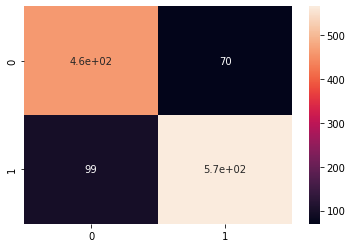

In [ ]:
import matplotlib.pyplot as plt
df_cm = pd.DataFrame(mat, range(2), range(2))

sns.heatmap(df_cm, annot=True) 
plt.show()

In [ ]:
print(sklearn.metrics.classification_report(true,predicted,target_names=['POSITIVE','NEGATIVE']))

              precision    recall  f1-score   support

    POSITIVE       0.82      0.87      0.85       533
    NEGATIVE       0.89      0.85      0.87       665

    accuracy                           0.86      1198
   macro avg       0.86      0.86      0.86      1198
weighted avg       0.86      0.86      0.86      1198



# Evaluation on Test Data

In [ ]:
mod_output_path = "/content/drive/MyDrive/ABSA MS/ashish/BERT/outputs"

In [ ]:
from simpletransformers.classification import ClassificationModel
model = ClassificationModel(
    "bert", mod_output_path, use_cuda=False, args={'silent': True})

In [ ]:
import numpy as np
from scipy.special import softmax
import math

def get_result(statement):
    # try:
      result, raw_output = model.predict(statement)
      pos = int(result[0])
      sentiment_dict = {1:'positive',0:'negative'}
      return pd.Series(sentiment_dict[pos])



In [ ]:
test.head()

,Unnamed: 0,Review,Rating,clean_reviews,sentence_reviews,room,staff,location,service,food,cosine_pred_category,cosine_pred_percentage,aspect_Polarity,asp_score
5912,5912,"enjoyed, stayed wedding night brought family f...",4,"enjoyed, stayed wedding night brought family f...",dealt three four different receptionists fant...,0.210510,0.329444,0.112383,0.261186,0.112416,staff,0.329444,POSITIVE,0.998803
9517,9517,great location great city shame renovations st...,3,great location great city shame renovations st...,got seven day pass twenty four airport waitin...,0.164665,0.224161,0.181155,0.228412,0.091910,service,0.228412,NEGATIVE,0.990790
1200,1200,good choice marqueen place stay going key aren...,4,good choice marqueen place stay going key aren...,room elegantly furnished bed comfortable,0.503014,0.159739,0.199034,0.178262,0.146835,room,0.503014,POSITIVE,0.998782
5390,5390,fabulous time elegance husband booked flight n...,4,fabulous time elegance husband booked flight n...,bar main lobby makes best capuccinos,0.238191,0.133374,0.229680,0.081475,0.129919,room,0.238191,POSITIVE,0.998585
8428,8428,"wonderful experience delight, stepping genteel...",5,"wonderful experience delight, stepping genteel...",furnishings dated electic,0.228097,0.157887,0.129474,0.169901,0.087374,room,0.228097,NEGATIVE,0.998818


In [ ]:
test['predictions'] = test['sentence_reviews'].astype(str).apply(get_result)


In [ ]:
# labelling pos as 1 and neg as 0
def making_label_new(st):
    if(st=='positive'):
        return 1
    else:
        return 0
    
test['label'] = test['aspect_Polarity'].apply(making_label)


In [ ]:
test['pred_label'] = test['predictions'].apply(making_label_new)


In [ ]:
test.to_csv('/content/drive/MyDrive/ABSA MS/ashish/BERT/test_prediction_bert.csv')

In [ ]:
test.head()

,Unnamed: 0,Review,Rating,clean_reviews,sentence_reviews,room,staff,location,service,food,cosine_pred_category,cosine_pred_percentage,aspect_Polarity,asp_score,predictions,pred_label,label
5912,5912,"enjoyed, stayed wedding night brought family f...",4,"enjoyed, stayed wedding night brought family f...",dealt three four different receptionists fant...,0.210510,0.329444,0.112383,0.261186,0.112416,staff,0.329444,POSITIVE,0.998803,positive,1,1
9517,9517,great location great city shame renovations st...,3,great location great city shame renovations st...,got seven day pass twenty four airport waitin...,0.164665,0.224161,0.181155,0.228412,0.091910,service,0.228412,NEGATIVE,0.990790,negative,0,0
1200,1200,good choice marqueen place stay going key aren...,4,good choice marqueen place stay going key aren...,room elegantly furnished bed comfortable,0.503014,0.159739,0.199034,0.178262,0.146835,room,0.503014,POSITIVE,0.998782,positive,1,1
5390,5390,fabulous time elegance husband booked flight n...,4,fabulous time elegance husband booked flight n...,bar main lobby makes best capuccinos,0.238191,0.133374,0.229680,0.081475,0.129919,room,0.238191,POSITIVE,0.998585,positive,1,1
8428,8428,"wonderful experience delight, stepping genteel...",5,"wonderful experience delight, stepping genteel...",furnishings dated electic,0.228097,0.157887,0.129474,0.169901,0.087374,room,0.228097,NEGATIVE,0.998818,negative,0,0


In [ ]:
true_test = test['label'].tolist()
pred_test = test['pred_label'].tolist()


In [ ]:
import sklearn
mat = sklearn.metrics.confusion_matrix(true_test , pred_test)
mat

array([[676,  32],
       [ 39, 751]])

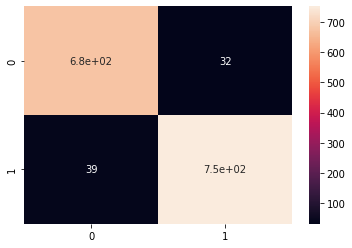

In [ ]:
import matplotlib.pyplot as plt
df_cm = pd.DataFrame(mat, range(2), range(2))

sns.heatmap(df_cm, annot=True) 
plt.show()

In [ ]:
print(sklearn.metrics.classification_report(true_test,pred_test,target_names=['positive','negative']))

              precision    recall  f1-score   support

    positive       0.95      0.95      0.95       708
    negative       0.96      0.95      0.95       790

    accuracy                           0.95      1498
   macro avg       0.95      0.95      0.95      1498
weighted avg       0.95      0.95      0.95      1498

